In [1]:
import sys

import os

# Get the absolute path of the project root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Add the project root directory to the Python path
sys.path.append(project_root)

In [2]:
import pandas as pd


project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

# Define the path to the data directory
data_dir = os.path.join(project_root, 'data')

# Example: Access a specific data file in the data directory
data_file_path = os.path.join(data_dir, 'RADCURE_challenge_clinical.csv')
df = pd.read_csv(data_file_path)

In [3]:
from jarvais.analyzer import Analyzer
from pprint import pprint

df.drop(columns=["Study ID", "split", "survival_time", "death"], inplace=True)

config = Analyzer.dry_run(df)

pprint(config)

/home/joshua-siraj/Documents/CDI/jarvais/.pixi/envs/default/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Config file not found. Creating custom...
Used a heuristic to define categorical and continuous columns. Please review!


Feature Types:
  - Categorical: ['N Stage', 'Stage', 'Disease Site', 'T Stage', 'Sex', 'HPV Combined', 'Chemotherapy', 'EGFRI', 'Dose']
  - Continuous: ['age at dx']


Outlier Analysis:
  - Outliers found in N Stage: ['N3a: 14 out of 2552', 'NX: 1 out of 2552']
  - Outliers found in Stage: ['IV: 6 out of 2549', 'IIIC: 2 out of 2549', 'IIIA: 2 out of 2549', 'IIA: 1 out of 2549']
  - Outliers found in Disease Site: ['esophagus: 22 out of 2552', 'salivary glands: 4 out of 2552']
  - Outliers found in T Stage: ['T2 (2): 1 out of 2552', 'TX: 1 out of 2552', 'T3 (2): 1 out of 2552']
  - No Outliers found in Sex
  - No Outliers found in HPV Combined
  - No Outliers found in Chemotherapy
  - No Outliers found in EGFRI
  - Outliers found in Dose: ['50.0: 9 out of 2552', '69.96: 2 out of 2552', '50.8: 1 out of 2552', '55.0: 1 out of 2552', '53.55: 1 out of 2552', '59.4: 1 out

In [4]:
import yaml
from pathlib import Path

config['columns']['categorical'].remove('Dose')
config['columns']['continuous'].append('Dose') 

pprint(config)

analyzer_path = Path('outputs/analyzer')
analyzer_path.mkdir(parents=True, exist_ok=True)

with open(analyzer_path / 'config.yaml', 'w') as f:
            yaml.dump(config, f)

{'columns': {'categorical': ['N Stage',
                             'Stage',
                             'Disease Site',
                             'T Stage',
                             'Sex',
                             'HPV Combined',
                             'Chemotherapy',
                             'EGFRI'],
             'continuous': ['age at dx', 'Dose'],
             'date': [],
             'other': []},
 'mapping': {'Chemotherapy': {'0': '0', '1': '1'},
             'Disease Site': {'esophagus': 'Other',
                              'hypopharynx': 'hypopharynx',
                              'larynx': 'larynx',
                              'lip & oral cavity': 'lip & oral cavity',
                              'nasal cavity': 'nasal cavity',
                              'nasopharynx': 'nasopharynx',
                              'oropharynx': 'oropharynx',
                              'paranasal sinus': 'paranasal sinus',
                              'saliva

In [5]:
from jarvais.analyzer import Analyzer

analyzer = Analyzer(df, target_variable='Dose', output_dir='./outputs/analyzer', config='outputs/analyzer/config.yaml')

analyzer.run()

Feature Types:
  - Categorical: ['N Stage', 'Stage', 'Disease Site', 'T Stage', 'Sex', 'HPV Combined', 'Chemotherapy', 'EGFRI']
  - Continuous: ['age at dx', 'Dose']


Outlier Analysis:
  - Outliers found in N Stage: ['N3a: 14 out of 2552', 'NX: 1 out of 2552']
  - Outliers found in Stage: ['IV: 6 out of 2549', 'IIIC: 2 out of 2549', 'IIIA: 2 out of 2549', 'IIA: 1 out of 2549']
  - Outliers found in Disease Site: ['esophagus: 22 out of 2552', 'salivary glands: 4 out of 2552']
  - Outliers found in T Stage: ['T2 (2): 1 out of 2552', 'TX: 1 out of 2552', 'T3 (2): 1 out of 2552']
  - No Outliers found in Sex
  - No Outliers found in HPV Combined
  - No Outliers found in Chemotherapy
  - No Outliers found in EGFRI

Applying changes from config...

╒══════════════════════╤═══════════════════╤═══════════╤═════════════╕
│                      │                   │ Missing   │ Overall     │
╞══════════════════════╪═══════════════════╪═══════════╪═════════════╡
│ n                    │         

In [6]:
from jarvais.trainer import TrainerSupervised

df = pd.read_csv('./outputs/analyzer/updated_data.csv', index_col=0)

trainer = TrainerSupervised(task='regression', output_dir='./outputs/trainer')
trainer.run(df, 'Dose')

Training fold 1/5...
Fold 1 score: 0.6415226629823407
Training fold 2/5...
Fold 2 score: 0.6354727494158782
Training fold 3/5...
Fold 3 score: 0.6784427999882303
Training fold 4/5...
Fold 4 score: 0.6340258425139446
Training fold 5/5...
Fold 5 score: 0.6137623216481571

Model Leaderboard (Displays values in "mean [min, max]" format across training folds)
------------------------------------------------------------------------------------
╒═══════════════════════╤════════════════════════════╤════════════════════════════╤════════════════════════════╕
│ model                 │ score_test                 │ score_val                  │ score_train                │
╞═══════════════════════╪════════════════════════════╪════════════════════════════╪════════════════════════════╡
│ WeightedEnsemble_L2   │ R2 0.62 [0.62, 0.63]       │ R2 0.64 [0.61, 0.68]       │ R2 0.7 [0.69, 0.74]        │
│                       │ RMSE: -3.48 [-3.49, -3.46] │ RMSE: -3.36 [-3.58, -3.19] │ RMSE: -3.05 [-3.15, -2

Possible Bias in N Stage:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     7.502
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           1.78e-09
Time:                        14:04:41   Log-Likelihood:                -2394.9
No. Observations:                 511   AIC:                             4808.
Df Residuals:                     502   BIC:                             4846.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5

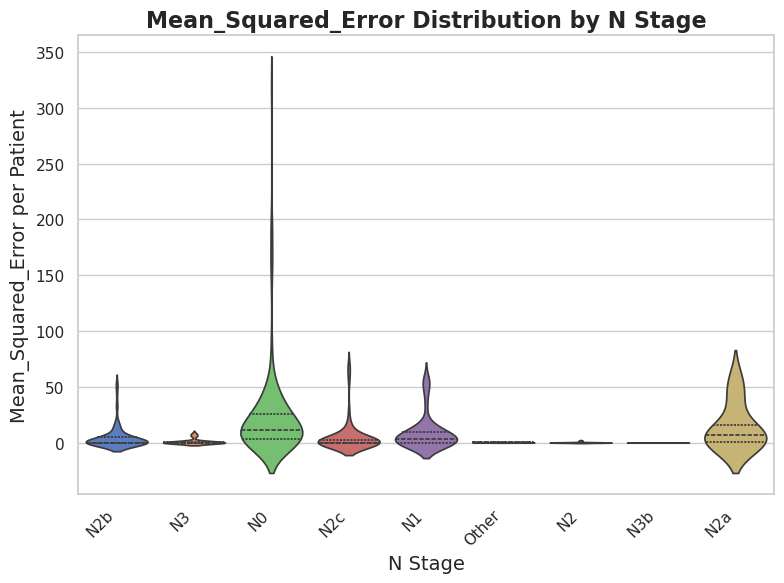

Subgroup Analysis(N Stage)
╒══════════════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│                          │ N0                │ N1                │ N2                │ N2a               │
╞══════════════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│ mean_prediction          │ 63.06154393438083 │ 68.14472271845891 │ 69.90058333785446 │ 68.12633037567139 │
├──────────────────────────┼───────────────────┼───────────────────┼───────────────────┼───────────────────┤
│ Relative mean_prediction │ 1.000 ✅          │ 1.081 ✅          │ 1.108 ✅          │ 1.080 ✅          │
╘══════════════════════════╧═══════════════════╧═══════════════════╧═══════════════════╧═══════════════════╛

Possible Bias in Disease Site:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.121
Model:                 

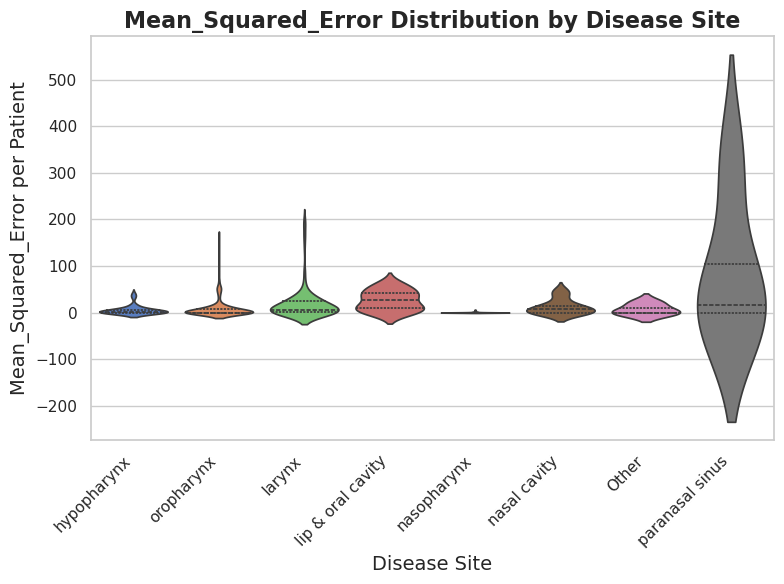

Subgroup Analysis(Disease Site)
╒══════════════════════════╤═══════════════════╤══════════════════╤════════════════════╤═════════════════════╕
│                          │ Other             │ hypopharynx      │ larynx             │ lip & oral cavity   │
╞══════════════════════════╪═══════════════════╪══════════════════╪════════════════════╪═════════════════════╡
│ mean_prediction          │ 68.44259134928386 │ 67.9584831237793 │ 62.553679077713575 │ 66.02217885067589   │
├──────────────────────────┼───────────────────┼──────────────────┼────────────────────┼─────────────────────┤
│ Relative mean_prediction │ 0.998 ✅          │ 0.991 ✅         │ 0.912 ✅           │ 0.963 ✅            │
╘══════════════════════════╧═══════════════════╧══════════════════╧════════════════════╧═════════════════════╛



In [7]:
from jarvais.explainer import Explainer

sensitive_features = {k: trainer.X_test[k] for k in ['N Stage', 'Disease Site', 'Sex']}

exp = Explainer.from_trainer(trainer, sensitive_features=sensitive_features)
exp.run()